In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.dates as mdate

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/covid_19_data.csv')
confirmed      = pd.read_csv('/content/drive/MyDrive/time_series_covid_19_confirmed.csv')


df_death     = pd.read_csv('/content/drive/MyDrive/time_series_covid_19_deaths.csv')
recovered = pd.read_csv('/content/drive/MyDrive/time_series_covid_19_recovered.csv')

print(confirmed.shape)
print(df_death.shape)
print(recovered.shape)

(276, 498)
(276, 498)
(261, 498)


In [ ]:
df["Country/Region"].unique()  # Shows unique "Countries/Regions" terms in our dataframe.

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [ ]:
print(df.head(3)) # first look at data, it gives us first 3 rows of dataframe  
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print(df.info(show_counts = False)) # Look at columns and their types
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print(df.columns)  # Shows dataframe's features -columns- .
print("-------------------------------------------------------------------------")
print("-------------------------------------------------------------------------")
print(df.describe())


   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
-------------------------------------------------------------------------
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   SNo              int64  
 1   ObservationDate  object 
 2   Province/State   object 
 3   Country/Region   object 
 4   Last Update      object 
 5   Confirmed        float64
 6   Deaths           float64
 7   Recovered        float64
dtypes: f

In [ ]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
df.describe

<bound method NDFrame.describe of            SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/

In [ ]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [ ]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [ ]:
df.shape

(306429, 8)

In [ ]:
#summarize the dataset
desc = df.describe()
desc

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [ ]:
#find null values
df.isnull().sum()
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
df.corr()

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.237319,0.197038,0.190511
Confirmed,0.237319,1.000000,0.888416,0.633479
Deaths,0.197038,0.888416,1.000000,0.538416
Recovered,0.190511,0.633479,0.538416,1.000000


In [ ]:
df.corr()
cor = df.iloc[:,0:7].corr()
print(cor)

                SNo  Confirmed    Deaths
SNo        1.000000   0.237319  0.197038
Confirmed  0.237319   1.000000  0.888416
Deaths     0.197038   0.888416  1.000000


In [ ]:
df.corr()
cor = df.iloc[:,0:12].corr()
print(cor)

                SNo  Confirmed    Deaths  Recovered
SNo        1.000000   0.237319  0.197038   0.190511
Confirmed  0.237319   1.000000  0.888416   0.633479
Deaths     0.197038   0.888416  1.000000   0.538416
Recovered  0.190511   0.633479  0.538416   1.000000


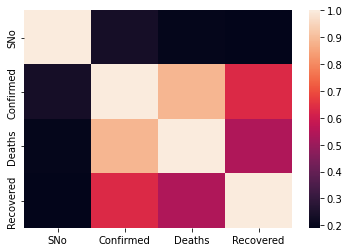

In [ ]:
# correlation using visualization
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

In [ ]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [ ]:
# Drop the 'Province_State' and ' County_Region' and  'Date' columns
df.drop(['ObservationDate','Province/State' , 'Country/Region' , 'Last Update'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(df.shape)

(306429, 4)


In [ ]:
# split the dataset into train and test
# --------------------------------------
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)

# split the train and test into X and Y variables
# ------------------------------------------------
train_x = train.iloc[:,0:3]; train_y = train.iloc[:,3]
test_x  = test.iloc[:,0:3];  test_y = test.iloc[:,3]
print(train_x)
print(test_x)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x.head()
train_y.head()

train.head()
train.tail()

train.dtypes

(214500, 4)
(91929, 4)
           SNo  Confirmed  Deaths
169177  169178     7665.0   133.0
198095  198096   356110.0  5138.0
125277  125278        0.0     0.0
227041  227042    48299.0  1575.0
236388  236389     9968.0   164.0
...        ...        ...     ...
305660  305661    29071.0   245.0
301162  301163     2142.0    85.0
202163  202164   641073.0  7745.0
144613  144614     2477.0    67.0
223383  223384     9302.0   159.0

[214500 rows x 3 columns]
           SNo  Confirmed   Deaths
119717  119718     8346.0    127.0
58700    58701      550.0      2.0
45082    45083     5279.0     51.0
48897    48898   159328.0  38427.0
241328  241329    11812.0    446.0
...        ...        ...      ...
227850  227851    18137.0    458.0
146127  146128    47299.0    723.0
191820  191821   128867.0   1499.0
54119    54120     3520.0     12.0
100270  100271    34287.0    397.0

[91929 rows x 3 columns]
(214500, 3)
(214500,)
(91929, 3)
(91929,)


SNo            int64
Confirmed    float64
Deaths       float64
Recovered    float64
dtype: object

In [ ]:
"""

"""

data_corre = df.drop("SNo", axis = 1) # "SNo" column and its values dropped. 

# corr() method enables us to calculate correlation with different methods by using its method parameter. 

corre1 = data_corre.corr(method ='pearson')   # standard correlation coefficient
corre2 = data_corre.corr(method ='kendall')   # Kendall Tau correlation coefficient
corre3 = data_corre.corr(method ='spearman')  # Spearman rank correlation


print("Standard Correlation Coefficients")
print(corre1)
print("-------------------------------------")
print("Kendall Tau Correlation Coefficients")
print(corre2)
print("-------------------------------------")
print("Spearman Rank Correlation Coefficients")
print(corre3)

Standard Correlation Coefficients
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.888416   0.633479
Deaths      0.888416  1.000000   0.538416
Recovered   0.633479  0.538416   1.000000
-------------------------------------
Kendall Tau Correlation Coefficients
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.795661   0.507880
Deaths      0.795661  1.000000   0.416845
Recovered   0.507880  0.416845   1.000000
-------------------------------------
Spearman Rank Correlation Coefficients
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.928772   0.502005
Deaths      0.928772  1.000000   0.453952
Recovered   0.502005  0.453952   1.000000


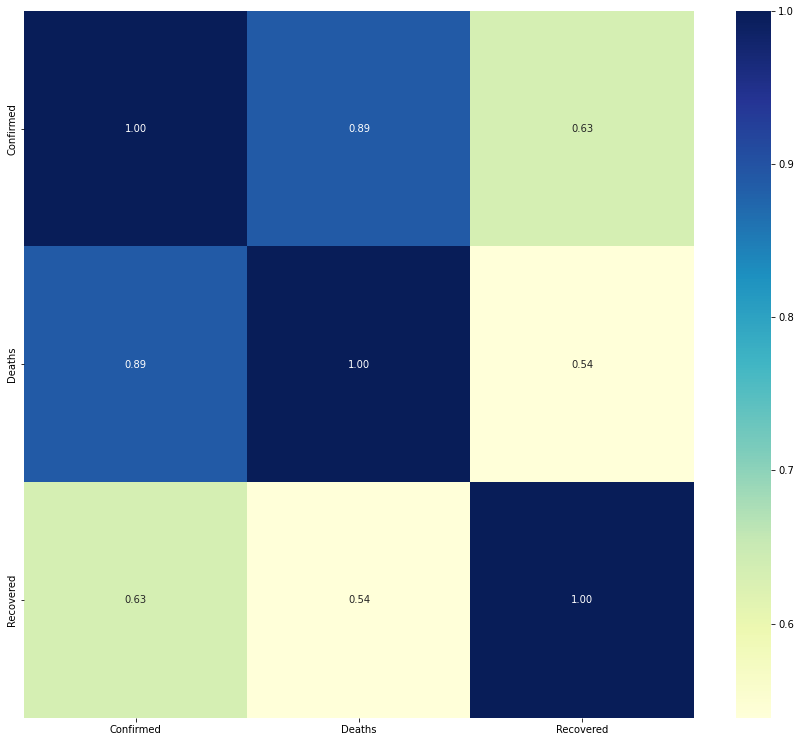

In [ ]:
f,ax = plt.subplots(figsize=(15, 13))   # Adjusting size of figure.
sns.heatmap(corre1, annot= True, fmt= '.2f',cmap="YlGnBu") 
plt.show()

# The parameters that is used;
# annot : Gives the numerical values in map.
# fmt : used to formatting the value.
# cmap : Changes the color of map. There are lots of options. E.g. "spring","bwr","hsv","Greens"...

In [ ]:
for a in df.columns:
    
    list1 = list(df[a])
    
    count = 0
    
    for i in list1:
        if(i == "Recovered"):
            count= count + 1
        else:
            count = count
    
    print(" The number of ""'Recovered'"" value inside {} column is {}".format(a,count))

 The number of 'Recovered' value inside SNo column is 0
 The number of 'Recovered' value inside Confirmed column is 0
 The number of 'Recovered' value inside Deaths column is 0
 The number of 'Recovered' value inside Recovered column is 0


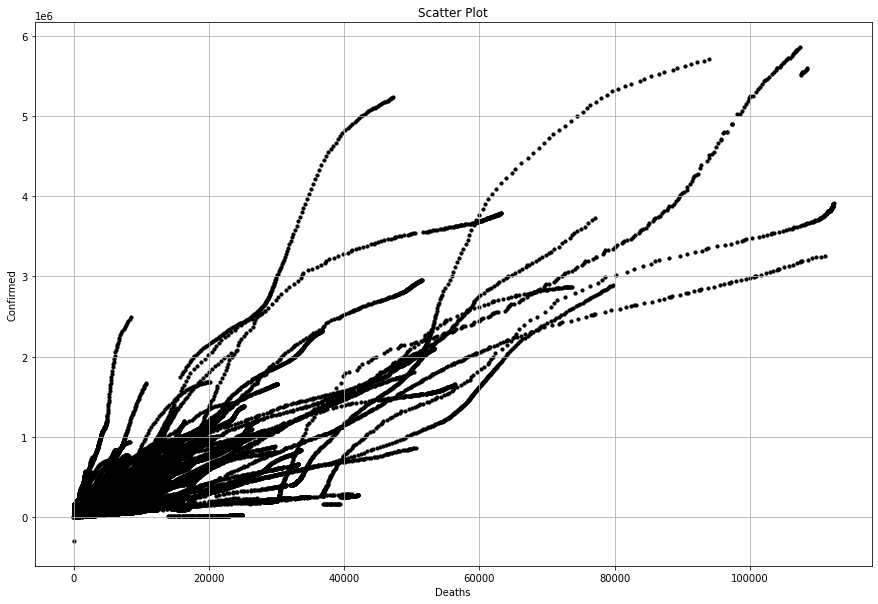

In [ ]:

df.plot(kind = "scatter", x='Deaths',y='Confirmed',grid = True,color = "black", s = 10 ,figsize=(15,10))
plt.xlabel('Deaths')             
plt.ylabel('Confirmed')
plt.title('Scatter Plot')  
plt.show()


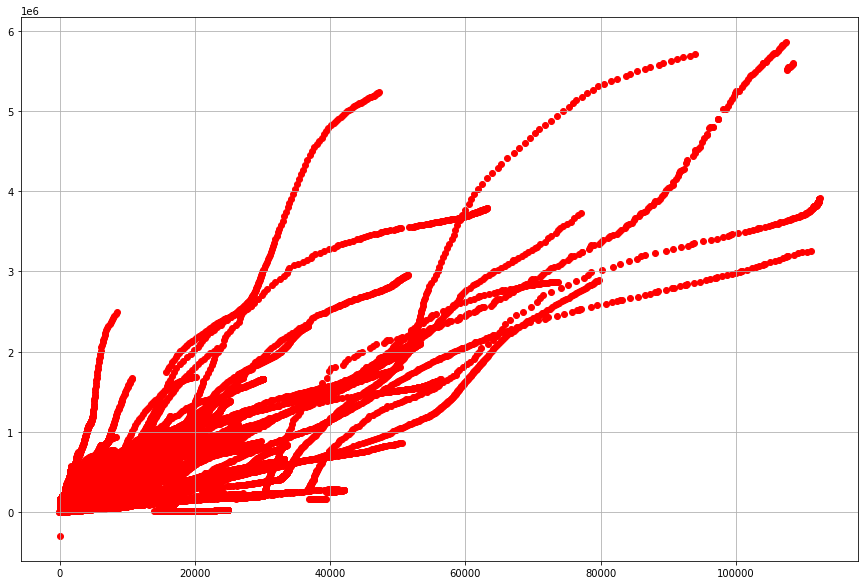

In [ ]:
f,ax = plt.subplots(figsize=(15, 10))
plt.scatter(df["Deaths"],df["Confirmed"],color = "red")
plt.grid()
plt.show()

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/time_series_covid_19_confirmed.csv') # importing the other data
df2.head(20) # importing the other data
df2.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [ ]:
a = df2.groupby("Country/Region").sum()
last_announcements = a.iloc[:,[-1]]  # taking their last announcement
last_announcements.rename(columns={'{}'.format(last_announcements.columns[0]) : "Confirmed"},inplace=True) # changing the column name 
print(last_announcements)

                    Confirmed
Country/Region               
Afghanistan             70111
Albania                132297
Algeria                128456
Andorra                 13693
Angola                  34180
...                       ...
Vietnam                  6908
West Bank and Gaza     307838
Yemen                    6731
Zambia                  94751
Zimbabwe                38933

[193 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
TOP_COUNTRY_COUNT = 10

country_wise_total = []
top_countries = []
for i in range(len(df_conf)):
    row = df_conf.iloc[i]
    country = row['Country/Region']
    confirmed_cases = row[-1]
    country_wise_total.append((country, confirmed_cases))
    
country_wise_total.sort(key=lambda x: x[-1], reverse=True)


df_country_wise = pd.DataFrame(country_wise_total, columns=['Country', 'Cases'])
# p = plt.pie(df_country_wise['Cases'][:10], labels=df_country_wise['Country'][:10])
px.pie(df_country_wise, names=df_country_wise['Country'][:TOP_COUNTRY_COUNT], values=df_country_wise['Cases'][:TOP_COUNTRY_COUNT], title='Top 10 contires contribution so far')


In [ ]:
store = {}

for i in range(TOP_COUNTRY_COUNT):
    top_countries.append(country_wise_total[i][0])
    
for i in range(len(df_conf)):
    row = df_conf.iloc[i]
    if not (row[1] in top_countries):
        continue
    series = list(row[4:])
    country = row[1]
    store[country] = list(series)

df_top_countries = pd.DataFrame(store)
corr = df_top_countries.corr()
corr

,Argentina,Brazil,France,Germany,India,Italy,Russia,Turkey,US,United Kingdom
Argentina,1.000000,0.989144,0.984509,0.972304,0.978640,0.972468,0.977946,0.951640,0.975300,0.956191
Brazil,0.989144,1.000000,0.975941,0.966447,0.962808,0.966385,0.982065,0.948027,0.978325,0.952966
France,0.984509,0.975941,1.000000,0.992296,0.942484,0.995239,0.977734,0.973748,0.979334,0.974961
Germany,0.972304,0.966447,0.992296,1.000000,0.925600,0.997643,0.979124,0.986444,0.984333,0.985302
India,0.978640,0.962808,0.942484,0.925600,1.000000,0.920502,0.924179,0.923898,0.917496,0.884256
Italy,0.972468,0.966385,0.995239,0.997643,0.920502,1.000000,0.980931,0.977806,0.984651,0.985189
Russia,0.977946,0.982065,0.977734,0.979124,0.924179,0.980931,1.000000,0.945153,0.998234,0.986591
Turkey,0.951640,0.948027,0.973748,0.986444,0.923898,0.977806,0.945153,1.000000,0.952081,0.949467
US,0.975300,0.978325,0.979334,0.984333,0.917496,0.984651,0.998234,0.952081,1.000000,0.992531
United Kingdom,0.956191,0.952966,0.974961,0.985302,0.884256,0.985189,0.986591,0.949467,0.992531,1.000000


In [ ]:
px.imshow(corr, labels=dict(x="Countries", y="Countries", color="Correlation"), x = corr.columns, y = corr.columns, title="Similar spread comparision between contries")


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/time_series_covid_19_confirmed.csv") # importing the other data
df2.head(20) # importing the other data
df2.head(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1255,1255,1257,1257,1258,1258,1258,1258,1259,1259
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,221559,221699,221880,221948,221982,222139,222269,222409,222513,222555
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,124,124,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585


In [ ]:
a = df2.groupby("Country/Region").sum()
last_announcements = a.iloc[:,[-1]]  # taking their last announcement
last_announcements.rename(columns={'{}'.format(last_announcements.columns[0]) : "Confirmed"},inplace=True) # changing the column name 
print(last_announcements)

                    Confirmed
Country/Region               
Afghanistan             70111
Albania                132297
Algeria                128456
Andorra                 13693
Angola                  34180
...                       ...
Vietnam                  6908
West Bank and Gaza     307838
Yemen                    6731
Zambia                  94751
Zimbabwe                38933

[193 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [ ]:
columns = df_death.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [ ]:
df_death = df_death.loc[:, columns[4]:columns[-1]]
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,0,0,0,0,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,0,0,0,0,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,0,0,0,0,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,0,0,0,0,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,0,0,0,0,0,0,0,0,0,...,39,41,42,43,44,44,45,46,47,47
272,0,0,0,0,0,0,0,0,0,0,...,3448,3452,3459,3459,3470,3480,3483,3483,3489,3492
273,0,0,0,0,0,0,0,0,0,0,...,1301,1302,1304,1307,1310,1311,1313,1315,1316,1319
274,0,0,0,0,0,0,0,0,0,0,...,1265,1266,1267,1268,1271,1271,1273,1275,1275,1276


In [ ]:
len(df_death.keys())

494

In [ ]:
df_death['1/22/20'].sum()

17

In [ ]:
df_death['8/12/20'].sum()

744450

In [ ]:
#creating the variable:
dates = df_death.keys()
y = []
for i in dates:
    y.append(df_death[i].sum())

In [ ]:
print(y)

[17, 18, 26, 42, 56, 82, 131, 133, 171, 213, 259, 362, 426, 492, 564, 634, 719, 806, 906, 1013, 1113, 1118, 1371, 1523, 1666, 1770, 1868, 2008, 2123, 2248, 2252, 2459, 2470, 2630, 2710, 2771, 2814, 2873, 2942, 2996, 3085, 3160, 3255, 3349, 3460, 3564, 3803, 3993, 4267, 4611, 4917, 5414, 5834, 6475, 7153, 7967, 8874, 9985, 11470, 13192, 14878, 16827, 19117, 21927, 24962, 28450, 32180, 35699, 39780, 44528, 50526, 56413, 62574, 68488, 73676, 79614, 87872, 94683, 102467, 109845, 116017, 121876, 127842, 134812, 143285, 150544, 158938, 165083, 170316, 176188, 183461, 190325, 197153, 203923, 209551, 213530, 218276, 224854, 231579, 237421, 242572, 248067, 251578, 255791, 261614, 268119, 273429, 278981, 283206, 286765, 290251, 295736, 300868, 306037, 311258, 315434, 318621, 322384, 327031, 331810, 336469, 341713, 345640, 348656, 349868, 354110, 359166, 363718, 368326, 372350, 375042, 378115, 382792, 388224, 393258, 397836, 401605, 404345, 408047, 412821, 417864, 422504, 426713, 430829, 434229, 

In [ ]:
y = np.array(y).reshape(-1,1) #will be transformed into matrix format
y

array([[     17],
       [     18],
       [     26],
       [     42],
       [     56],
       [     82],
       [    131],
       [    133],
       [    171],
       [    213],
       [    259],
       [    362],
       [    426],
       [    492],
       [    564],
       [    634],
       [    719],
       [    806],
       [    906],
       [   1013],
       [   1113],
       [   1118],
       [   1371],
       [   1523],
       [   1666],
       [   1770],
       [   1868],
       [   2008],
       [   2123],
       [   2248],
       [   2252],
       [   2459],
       [   2470],
       [   2630],
       [   2710],
       [   2771],
       [   2814],
       [   2873],
       [   2942],
       [   2996],
       [   3085],
       [   3160],
       [   3255],
       [   3349],
       [   3460],
       [   3564],
       [   3803],
       [   3993],
       [   4267],
       [   4611],
       [   4917],
       [   5414],
       [   5834],
       [   6475],
       [   7153],
       [  

In [ ]:
x = np.arange(len(dates)).reshape(-1,1) #will generate the number of dates according to the size of the "dates"
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
forecast = np.arange(len(dates) + 15).reshape(-1,1)
forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
x.shape, y.shape, forecast.shape 

((494, 1), (494, 1), (509, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.10, shuffle = False)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, X_train_poly.shape, X_test_poly.shape

((444, 1), (50, 1), (444, 3), (50, 3))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly, Y_train)

LinearRegression()

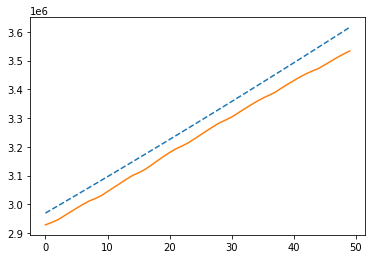

In [ ]:
poly_pred = lr.predict(X_test_poly)
plt.plot(poly_pred, linestyle = 'dashed')
plt.plot(Y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE:', mean_absolute_error(poly_pred, Y_test))
print('MSE:', mean_squared_error(poly_pred, Y_test))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred, Y_test)))

MAE: 54992.46061528667
MSE: 3125833021.5660973
RMSE: 234.50471341806048


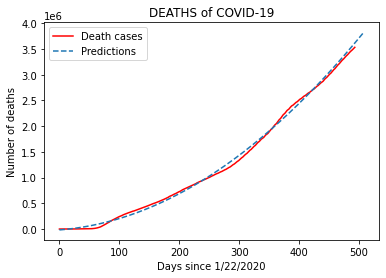

In [ ]:
X_train_all = poly.transform(forecast)
pred_all = lr.predict(X_train_all)

plt.plot(forecast[:-15], y, color='red')
plt.plot(forecast, pred_all, linestyle='dashed')
plt.title('DEATHS of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.legend(['Death cases', 'Predictions']);

In [ ]:
columns1 = confirmed.keys()
columns1

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [ ]:
confirmed = confirmed.loc[:, columns1[4]:columns1[-1]]
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,0,0,0,0,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,0,0,0,0,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,0,0,0,0,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,0,0,0,0,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,0,0,0,0,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0,2,2,2,2,2,2,2,2,2,...,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908
272,0,0,0,0,0,0,0,0,0,0,...,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838
273,0,0,0,0,0,0,0,0,0,0,...,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731
274,0,0,0,0,0,0,0,0,0,0,...,92754,92920,93106,93201,93279,93428,93627,93947,94430,94751


In [ ]:
confirmed['1/22/20'].sum(), confirmed['8/12/20'].sum()

(557, 20635977)

In [ ]:

dates1 = confirmed.keys()
y_c = []
for i in dates1:
    y_c.append(confirmed[i].sum())



In [ ]:
print(y_c)

[557, 655, 941, 1433, 2118, 2927, 5578, 6167, 8235, 9927, 12038, 16787, 19887, 23898, 27643, 30803, 34396, 37130, 40160, 42769, 44811, 45229, 60382, 66909, 69052, 71235, 73270, 75152, 75652, 76212, 76841, 78602, 78982, 79546, 80399, 81376, 82736, 84122, 86013, 88394, 90377, 92971, 95279, 98090, 102003, 106098, 110047, 114219, 119041, 126702, 132492, 146876, 157950, 169219, 184027, 199970, 219535, 246584, 277359, 309350, 344205, 387040, 428219, 479220, 542097, 607138, 674418, 733655, 798949, 875794, 958602, 1041662, 1125221, 1183584, 1256176, 1329331, 1399162, 1482540, 1569554, 1655088, 1729371, 1849067, 1919809, 2003820, 2080934, 2176465, 2264462, 2341702, 2418307, 2494325, 2570074, 2651321, 2735570, 2819666, 2901925, 2973513, 3043705, 3119245, 3196355, 3279850, 3368226, 3447426, 3523799, 3601488, 3681990, 3772018, 3860724, 3951003, 4036226, 4111202, 4187833, 4272324, 4357304, 4453535, 4549267, 4643706, 4721728, 4810895, 4907670, 5009548, 5116192, 5222614, 5327418, 5421629, 5508346, 56

In [ ]:
y_c = np.array(y_c).reshape(-1,1)
y_c

array([[      557],
       [      655],
       [      941],
       [     1433],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30803],
       [    34396],
       [    37130],
       [    40160],
       [    42769],
       [    44811],
       [    45229],
       [    60382],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79546],
       [    80399],
       [    81376],
       [    82736],
       [    84122],
       [    86013],
       [    88394],
       [    90377],
       [    92971],
       [    95279],
       [    98090],
       [   102003],
       [   106098],
       [   110047],
       [   114219],
       [   119041],
       [   126702],


In [ ]:
x_c = np.arange(len(dates1)).reshape(-1,1)
x_c

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
forecast_c = np.arange(len(dates1) + 15).reshape(-1,1)
forecast_c

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
x_c.shape, y_c.shape, forecast_c.shape 

((494, 1), (494, 1), (509, 1))

In [ ]:
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(x_c, y_c, test_size = 0.10, shuffle = False)

In [ ]:
poly_c = PolynomialFeatures(degree = 4)
X_train_poly_c = poly_c.fit_transform(X_train_c)
X_test_poly_c = poly_c.transform(X_test_c)

In [ ]:
X_train_c.shape, X_test_c.shape, X_train_poly_c.shape, X_test_poly_c.shape

((444, 1), (50, 1), (444, 5), (50, 5))

In [ ]:
lr_c = LinearRegression()
lr_c.fit(X_train_poly_c, Y_train_c)

LinearRegression()

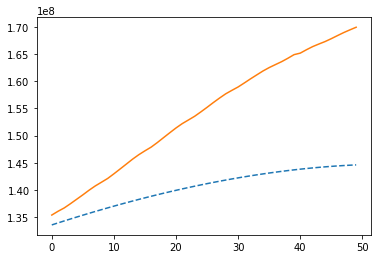

In [ ]:
poly_pred_c = lr_c.predict(X_test_poly_c)
plt.plot(poly_pred_c, linestyle = 'dashed')
plt.plot(Y_test_c)

In [ ]:
print('MAE:', mean_absolute_error(poly_pred_c, Y_test_c))
print('MSE:', mean_squared_error(poly_pred_c, Y_test_c))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred_c, Y_test_c)))

MAE: 13651113.521079566
MSE: 238966911950962.47
RMSE: 3694.741333446709


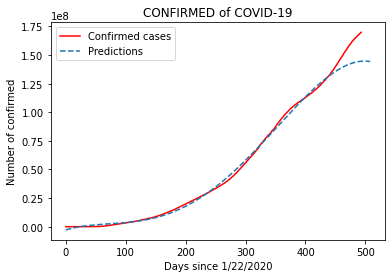

In [ ]:
X_train_all_c = poly_c.transform(forecast_c)
pred_all_c = lr_c.predict(X_train_all_c)

plt.plot(forecast_c[:-15], y_c, color='red')
plt.plot(forecast_c, pred_all_c, linestyle='dashed')
plt.title('CONFIRMED of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of confirmed')
plt.legend(['Confirmed cases', 'Predictions']);

In [ ]:
columns2 = recovered.keys()
columns2

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', length=498)

In [ ]:
recovered = recovered.loc[:, columns2[4]:columns2[-1]]
recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,0,0,0,0,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,0,0,0,0,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,0,0,0,0,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,0,0,0,0,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,0,0,0,0,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,0,0,0,0,0,0,0,0,0,...,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896
257,0,0,0,0,0,0,0,0,0,0,...,295643,296901,297201,297201,298502,299024,299559,299559,300125,300524
258,0,0,0,0,0,0,0,0,0,0,...,3159,3179,3201,3245,3260,3273,3306,3339,3375,3399
259,0,0,0,0,0,0,0,0,0,0,...,90955,91019,91102,91156,91200,91221,91239,91321,91443,91594


In [ ]:
recovered['1/22/20'].sum(), recovered['8/12/20'].sum()

(30, 12829864)

In [ ]:
dates2 = recovered.keys()
y_r = []
for i in dates2:
    y_r.append(recovered[i].sum())

In [ ]:
print(y_r)

[30, 32, 39, 42, 56, 65, 108, 127, 145, 225, 287, 476, 627, 857, 1129, 1492, 2016, 2616, 3245, 3947, 4684, 5151, 6294, 8057, 9396, 10866, 12583, 14352, 16121, 18179, 18892, 22889, 23394, 25227, 27905, 30386, 33278, 36710, 39781, 42717, 45601, 48227, 51169, 53795, 55863, 58357, 60694, 62493, 64400, 66998, 68321, 70248, 72620, 76031, 78086, 80830, 83317, 84958, 87403, 91650, 97867, 98335, 107974, 113753, 122125, 130910, 139421, 148877, 164214, 177804, 193076, 210219, 225641, 246053, 259889, 276598, 299860, 328742, 353996, 375734, 401984, 421367, 448624, 473698, 510237, 541120, 567304, 591170, 622953, 645131, 679933, 710018, 738748, 788777, 816532, 845344, 873228, 906440, 948517, 1013633, 1051790, 1092441, 1124974, 1159060, 1195533, 1241652, 1281177, 1317590, 1371031, 1404840, 1451725, 1488767, 1544639, 1584350, 1632453, 1688864, 1729872, 1782788, 1834840, 1893810, 1945030, 2053577, 2108411, 2163938, 2227667, 2282819, 2346146, 2413009, 2490274, 2560724, 2637108, 2692033, 2796145, 2875236,

In [ ]:
y_r = np.array(y_r).reshape(-1,1)
y_r

array([[       30],
       [       32],
       [       39],
       [       42],
       [       56],
       [       65],
       [      108],
       [      127],
       [      145],
       [      225],
       [      287],
       [      476],
       [      627],
       [      857],
       [     1129],
       [     1492],
       [     2016],
       [     2616],
       [     3245],
       [     3947],
       [     4684],
       [     5151],
       [     6294],
       [     8057],
       [     9396],
       [    10866],
       [    12583],
       [    14352],
       [    16121],
       [    18179],
       [    18892],
       [    22889],
       [    23394],
       [    25227],
       [    27905],
       [    30386],
       [    33278],
       [    36710],
       [    39781],
       [    42717],
       [    45601],
       [    48227],
       [    51169],
       [    53795],
       [    55863],
       [    58357],
       [    60694],
       [    62493],
       [    64400],
       [    66998],


In [ ]:
x_r = np.arange(len(dates2)).reshape(-1,1)
x_r

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
forecast_r = np.arange(len(dates2) + 15).reshape(-1,1)
forecast_r

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [ ]:
x_r.shape, y_r.shape, forecast_r.shape

((494, 1), (494, 1), (509, 1))

In [ ]:
X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(x_r, y_r, test_size = 0.30, shuffle = False)

In [ ]:
poly_r = PolynomialFeatures(degree = 3)
X_train_poly_r = poly_r.fit_transform(X_train_r)
X_test_poly_r = poly_r.transform(X_test_r)

In [ ]:
X_train_r.shape, X_test_r.shape, X_train_poly_r.shape, X_test_poly_r.shape

((345, 1), (149, 1), (345, 4), (149, 4))

In [ ]:
lr_r = LinearRegression()
lr_r.fit(X_train_poly_r, Y_train_r)

LinearRegression()

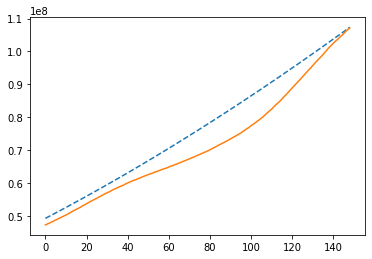

In [ ]:
poly_pred_r = lr_r.predict(X_test_poly_r)
plt.plot(poly_pred_r, linestyle = 'dashed')
plt.plot(Y_test_r)

In [ ]:
print('MAE:', mean_absolute_error(poly_pred_r, Y_test_r))
print('MSE:', mean_squared_error(poly_pred_r, Y_test_r))
print('RMSE:', np.sqrt(mean_absolute_error(poly_pred_r, Y_test_r)))

MAE: 4952708.21111683
MSE: 32132045587790.812
RMSE: 2225.4680880922174


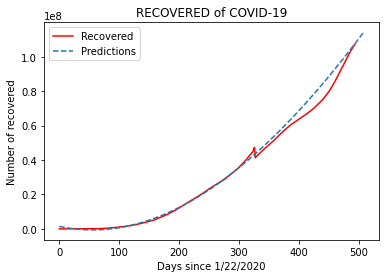

In [ ]:
X_train_all_r = poly_r.transform(forecast_r)
pred_all_r = lr_r.predict(X_train_all_r)

plt.plot(forecast_r[:-15], y_r, color='red')
plt.plot(forecast_r, pred_all_r, linestyle='dashed')
plt.title('RECOVERED of COVID-19')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('Number of recovered')
plt.legend(['Recovered', 'Predictions']);

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For Viz
import plotly.express as px
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3)
print(train.shape)
print(test.shape)
#train = train.drop(columns= ['ObservationDate','Last Update','SNo'])
#test = test.drop(columns= ['ObservationDate','Last Update','SNo'])

#train_x = pd.get_dummies(train)
#test_x = pd.get_dummies(test)

train_x = train.iloc[:,:]; train_y = train.loc[:,'Deaths']
test_x  = test.iloc[:,:];  test_y = test.loc[:,'Deaths']
train_x.drop(columns = ['Deaths'],inplace = True)
test_x.drop(columns = ['Deaths'],inplace = True)
print(train_x)



# #/train_x['Province/State'] = pd.factorize(train_x['Province/State'])[0]
# train_x['Country/Region'] = pd.factorize(train_x['Country/Region'])[0]

# test_x['Province/State'] = pd.factorize(test_x['Province/State'])[0]
# test_x['Country/Region'] = pd.factorize(test_x['Country/Region'])[0]
print(test_x)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x.head()
train_y.head()

train.head()
train.tail()


train.dtypes

(214500, 8)
(91929, 8)
           SNo ObservationDate     Province/State  \
244594  244595      03/10/2021                NaN   
5894      5895      03/15/2020            Alabama   
44591    44592      06/17/2020   Karelia Republic   
44259    44260      06/17/2020                NaN   
62277    62278      07/11/2020           Nagasaki   
...        ...             ...                ...   
188278  188279      12/26/2020            Jiangsu   
197759  197760      01/07/2021            Utrecht   
204629  204630      01/16/2021            Unknown   
176864  176865      12/11/2020  Kirovohrad Oblast   
89329    89330      08/17/2020                NaN   

                          Country/Region          Last Update  Confirmed  \
244594  Saint Vincent and the Grenadines  2021-04-02 15:13:53     1670.0   
5894                                  US  2020-03-15T18:20:19       12.0   
44591                             Russia  2021-04-02 15:13:53      869.0   
44259                          Guate

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Recovered          float64
dtype: object

In [ ]:
train_x.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Recovered
244594,244595,03/10/2021,NaN,Saint Vincent and the Grenadines,2021-04-02 15:13:53,1670.0,1107.0
5894,5895,03/15/2020,Alabama,US,2020-03-15T18:20:19,12.0,0.0
44591,44592,06/17/2020,Karelia Republic,Russia,2021-04-02 15:13:53,869.0,334.0
44259,44260,06/17/2020,NaN,Guatemala,2021-04-02 15:13:53,11251.0,2200.0
62277,62278,07/11/2020,Nagasaki,Japan,2021-04-02 15:13:53,22.0,17.0


In [ ]:
train_y.head()

244594      8.0
5894        0.0
44591       2.0
44259     432.0
62277       1.0
Name: Deaths, dtype: float64

In [ ]:
lm1 = sm.OLS( train_y,train_x).fit()
pred = lm1.predict(test_x)
print(pred)

In [ ]:
actual = list(test_y.head(5))
type(actual)
predicted = np.round(np.array(list(pred.head(5))),2)
print(predicted)
type(predicted)
df_results = pd.DataFrame({'actual':actual, 'predicted':predicted})
print(df_results)

In [ ]:
#To Check the Accuracy:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred))) 

Mean Absolute Error: 967.351346157257
Mean Squared Error: 8626825.765972307
Root Mean Squared Error: 2937.1458537111002
